In [2]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder
import category_encoders as encoders
import xgboost as xgb
import lightgbm as lgb
import catboost as cab
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, KFold,RepeatedKFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score，f1_score, precision_score, recall_score

import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("new_data.csv")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[237, 227, 235, 230, 214, 251, 211, 248, 217, 228, 223, 208, 233, 234, 207, 232, 209, 219, 221, 213, 231, 226, 236, 246, 218, 201, 220, 229, 225, 241, 215, 222, 203, 204, 206, 210, 245, 216, 202, 224, 205, 212]
[0.7604166666666666, 0.7863829787234042, 0.7295762341633901, 0.6742770167427702, 0.7509637625289128, 0.8670645686380901, 0.7863095238095238, 0.7695883134130146, 0.6879904875148632, 0.7586477987421384, 0.8349798755945848, 0.7966922146026624, 0.7625535227715065, 0.6440360090022506, 0.7138429752066116, 0.700548795036984, 0.7107692307692308, 0.7207661290322581, 0.8888464476699771, 0.7648456057007126, 0.6643458079489412, 0.7528417097228746, 0.7214943342776204, 0.7402731254831229, 0.8397940208839937, 0.708925127126074, 0.7382685457642868, 0.6845425867507886, 0.8102836879432624, 0.7076502732240437, 0.7416413373860182, 0.7764558547276142, 0.8168389955686853, 0.7745510518214469, 0.6382450331125827, 0.7793899422918384, 0.7199917644636606, 0.8158914728682171, 0.7400135409614083, 0.86799381

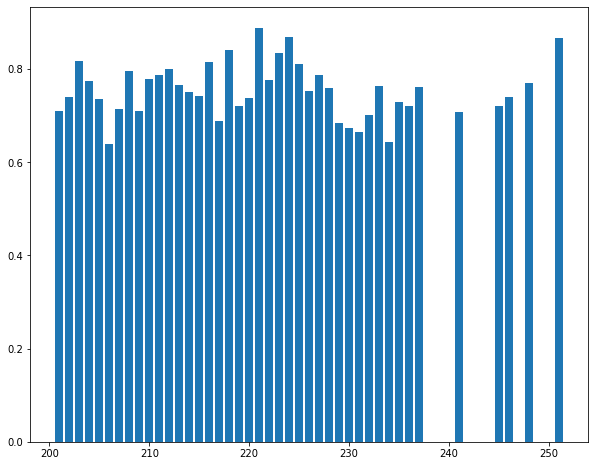

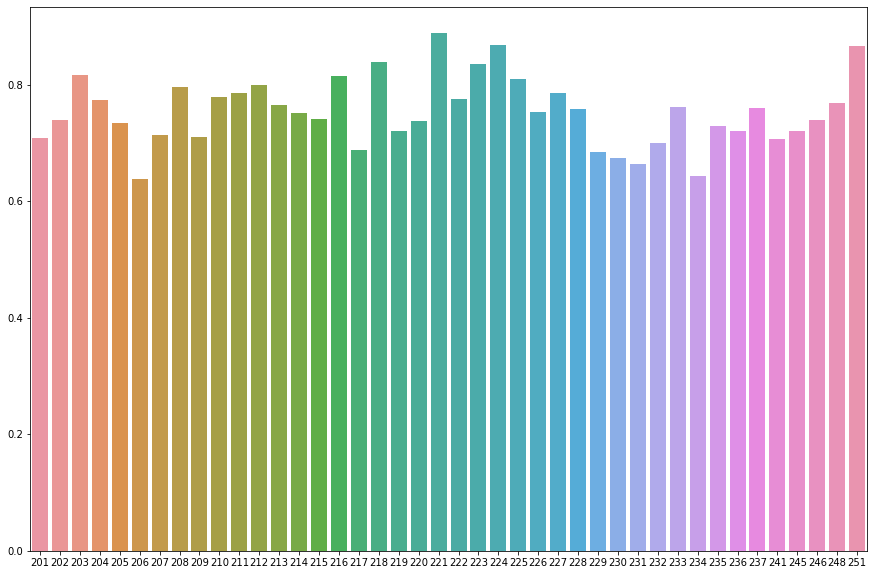

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
data=df_datas[df_datas['high_user']==1]
data['y']=data.groupby('dpt')['y1_is_purchase'].transform('mean')
data=data[['dpt','y']].drop_duplicates(['dpt','y'], keep='last')
x=data['dpt'].tolist()
y=data['y'].tolist()
print(x)
print(y)
plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.show()
plt.figure(figsize=(15,10))
sns.barplot(x,y)
plt.show()

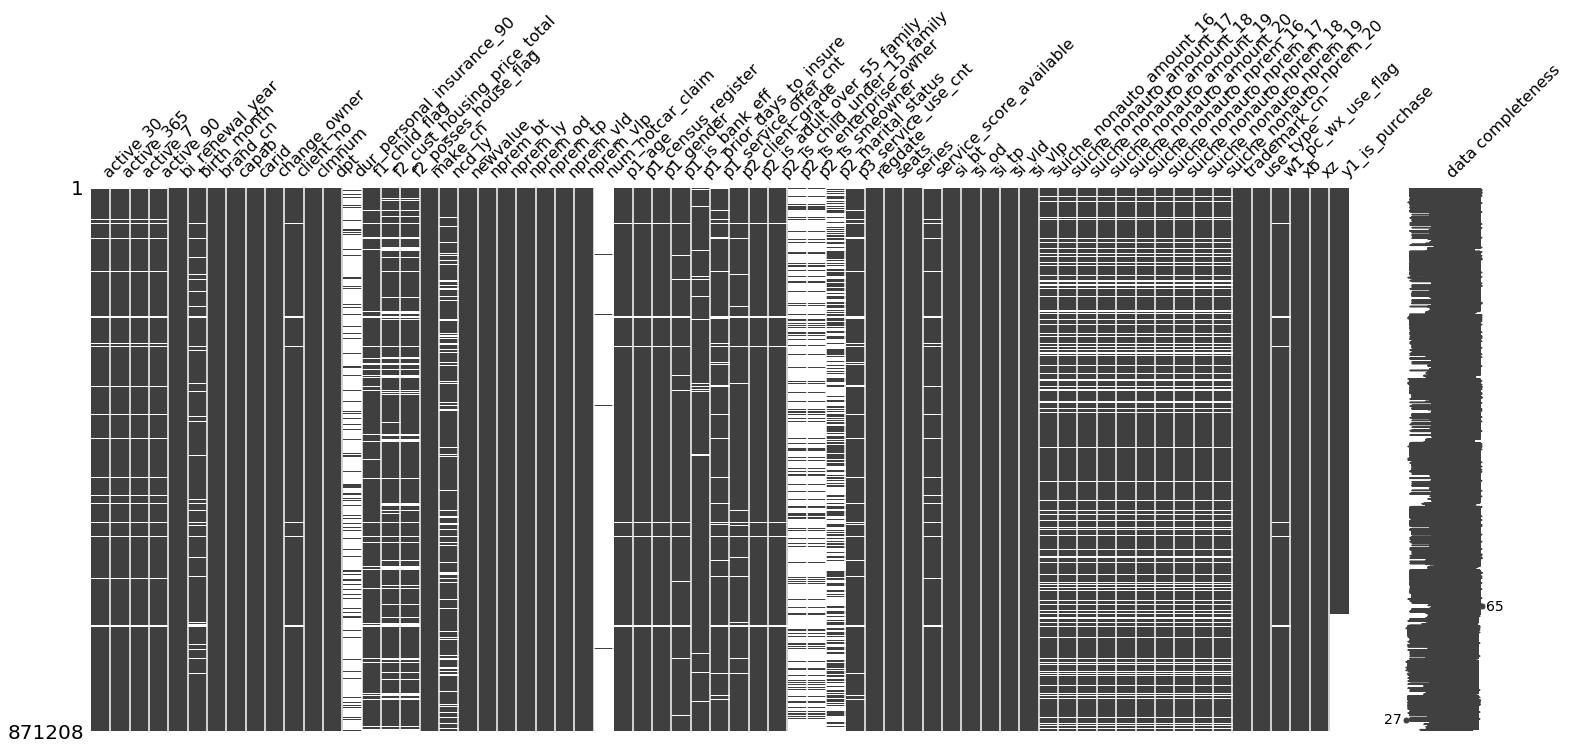

In [33]:
msno.matrix(df,labels=True)

In [4]:
df_datas=pd.read_csv("new_data.csv")
df_datas.head(5)
# df_datas.info()
# df_datas.describe()
#缺失值统计
# print((df_datas.shape[0]-df_datas.count())/df_datas.shape[0])

,active_30,active_365,active_7,active_90,bi_renewal_year,birth_month,brand_cn,capab,carid,change_owner,...,suiche_nonauto_nprem_17,suiche_nonauto_nprem_18,suiche_nonauto_nprem_19,suiche_nonauto_nprem_20,trademark_cn,use_type,w1_pc_wx_use_flag,xb,xz,y1_is_purchase
0,0.0,32.0,0.0,3.0,6,6月,长安福特马自达,1.498,WY4N+MOjfIx8wJ3j6GhlA4qEfL71brEUkqbB0SSdqkI=,非过户投保,...,NaN,NaN,NaN,NaN,福特,非营业,是,主全,商交,0.0
1,4.0,40.0,2.0,11.0,6,9月,天津丰田,2.497,DXMuODygH0ddFea7SIoAOhF4134Bx4TPvkkPi6WCdzU=,非过户投保,...,170.0,0.0,0.0,389.9,丰田,非营业,是,主全,商交,1.0
2,0.0,17.0,0.0,9.0,6,2月,长城汽车,2.771,waWCEYZJqj9PYxFdVeVLkpCNf/n0BdXPFi1iHlk0WWk=,非过户投保,...,0.0,0.0,0.0,350.0,长城,非营业,否,主全,商交,1.0
3,0.0,7.0,0.0,1.0,5,7月,一汽大众,1.984,nyRm/VviYGDpy2errRWE206SaYkVuqeclusAtXEU9v8=,非过户投保,...,170.0,0.0,19.9,9.9,奥迪,非营业,是,主全,商交,1.0
4,1.0,30.0,0.0,11.0,3,11月,上汽大众,1.798,LacSDMaoqD0AJRqCeYaGUu343r4NQiVuiFc9hyjLcMI=,非过户投保,...,0.0,0.0,0.0,0.0,大众,非营业,是,单交,单交,1.0


In [3]:
#数据预处理
from sklearn.preprocessing import LabelEncoder

no_fea=["carid","y1_is_purchase","dur_personal_insurance_90","num_notcar_claim","p2_is_enterprise_owner",
"p2_is_smeowner","p2_marital_status",'regdata']
time_list=['regdata','p1_prior_days_to_insure',"birth_month"]
def pre(datas,no_fea):
    lin_fill_list=datas[datas.isnull()].select_dtypes(include=['float']).columns
    na_fill_list=datas[datas.isnull()].select_dtypes(include=['object']).columns
    for col in lin_fill_list:
        if col not in no_fea:
            mode=datas[col].mode()
            datas[col].fillna(mode,inplace=True)
    for col in na_fill_list:
        if col not in no_fea:
            datas[col].fillna('na',inplace=True)
    object_list=datas.select_dtypes(include=['object']).columns
    
#     #类别特征处理
#     for col in object_list:
#         if col not in no_fea:
#             lb=LabelEncoder()
#             datas[col]=lb.fit_transform(datas[col].values)
    return datas
df_datas=pre(df_datas,no_fea)

print("OK")





OK


In [4]:
# #是否个数
# cols=['w1_pc_wx_use_flag','p1_is_bank_eff','p2_is_enterprise_owner','p2_is_smeowner']
# for col in cols:
#     df_datas[col]=df_datas[col].map(lambda x :1 if x=="是" else 0)
# df_datas['usr_is_sum']=df_datas[cols].sum(1)

#老人小孩关系
df_datas['usr_fimaly_num']=list(map(lambda x,y:1 if x=='是' and y=='是' else -1,df_datas['p2_is_child_under_15_family'],df_datas['p2_is_adult_over_55_family']))
# print(df_datas['usr_fimaly_num'])

# df_datas['usr_home_num']=list(map(lambda x,y:1 if x=='是' and y=='是' else -1,df_datas['f1_child_flag'],df_datas['f2_posses_house_flag']))

In [5]:
print(df_datas['nprem_od'].isnull().sum())

0


In [6]:
#频率编码
def freq_enc(df, col):
    vc = df[col].value_counts().to_dict()
    df[f'{col}_fre'] = df[col].map(vc)
    return df
fre_list=['trademark_cn',"brand_cn","make_cn","series","dpt","xz","xb","bi_renewal_year","clmnum","nprem_tp","nprem_od"
,"suiche_nonauto_nprem_20"]
for col in fre_list:
    df_datas=freq_enc(df_datas,col)
print("ok")



ok


In [7]:
feature=[['suiche_nonauto_nprem_20','suiche_nonauto_nprem_19','suiche_nonauto_nprem_18','suiche_nonauto_nprem_17','suiche_nonauto_nprem_16'],
         ['suiche_nonauto_amount_20','suiche_nonauto_amount_19','suiche_nonauto_amount_18','suiche_nonauto_amount_17','suiche_nonauto_amount_16']]
for fea in feature:
    df_datas[f'{fea[0][15:20]}_std']=df_datas[fea].std(1)
    df_datas[f'{fea[0][15:20]}_min']=df_datas[fea].min(1)
    df_datas[f'{fea[0][15:20]}_max']=df_datas[fea].max(1)
    df_datas[f'{fea[0][15:20]}_mean']=df_datas[fea].mean(1)
    df_datas[f'{fea[0][15:20]}_null']=df_datas[fea].isnull().astype(int).sum(1)
    df_datas[f'{fea[0][15:20]}_max-min']=df_datas[f'{fea[0][15:20]}_max']- df_datas[f'{fea[0][15:20]}_min']
    print(set(df_datas[f'{fea[0][15:20]}_null']))

{0, 5}
{0, 5}


In [5]:

#组合特征
df_datas['if_20_bf']=df_datas['suiche_nonauto_nprem_20'].map(lambda x:1 if x>0 else 0)
df_datas['w1_pc_wx_use_flag']=df_datas['w1_pc_wx_use_flag'].map(lambda x: 1 if x=='是' else 0)
df_datas['if_fs_20']=list(map(lambda x,y:x*y,df_datas['if_20_bf'],df_datas['w1_pc_wx_use_flag']))
df_datas['p1_gender_m_w']=df_datas['p1_gender'].map(lambda x:1 if x=='jh4mxXNEalwumcCWUJdnBw==' else 0)#性别
#等级
def dj(x):
    if "钻石" in str(x):
        return 6
    if "铂金" in str(x):
        return 5
    if "黄金" in str(x):
        return 4
    if "白银" in str(x):
        return 3
    if "黄铜" in str(x):
        return 2
    if "黑钻" in str(x):
        return 7
df_datas['user_dj']=list(map(lambda x: dj(x),df_datas['p2_client_grade']))
df_datas['user_dj_high_low']=df_datas['user_dj'].map(lambda x:1 if x>4 else 0)
df_datas['high_user']=list(map(lambda x,y,z:x*y*z,df_datas['user_dj_high_low'],df_datas['w1_pc_wx_use_flag'],df_datas['if_20_bf']))



In [9]:
#统计不同列对目标值的count编码
count_list=['si_bt','nprem_bt','si_tp','nprem_tp','nprem_od','si_od',"p2_client_grade","p2_is_child_under_15_family",
"p2_is_adult_over_55_family","seats","suiche_nonauto_amount_20","suiche_nonauto_nprem_20"]

for col in count_list:
    df_datas[f'{col}_count_buy_fea_y1']=df_datas.groupby(f'{col}')["y1_is_purchase"].transform('count')
    df_datas[f'{col}_count_buy_fea']=df_datas.groupby(f'{col}')["if_fs_20"].transform('count')
print("ok")







ok


In [11]:
#dpt
df_datas['dpt_high']=df_datas.groupby('dpt')['user_dj_high_low'].transform('sum')
df_datas['dpt_high_rate']=df_datas.groupby('dpt')['user_dj_high_low'].transform('mean')
df_datas['dpt_sum_20b']=df_datas.groupby('dpt')['suiche_nonauto_nprem_20'].transform('mean')
df_datas['dpt_mean_20b']=df_datas.groupby('dpt')['suiche_nonauto_nprem_20'].transform('sum')
# print(df_datas['dpt_mean_20b'])

df_datas['usr_suc_20']=df_datas.groupby('dpt')['if_20_bf'].transform('sum')
df_datas['usr_suc_20_rate']=df_datas.groupby('dpt')['if_20_bf'].transform('mean')

df_datas['if_19_bf']=df_datas['suiche_nonauto_nprem_19'].map(lambda x:1 if x>0 else 0)
df_datas['usr_suc_19']=df_datas.groupby('dpt')['if_20_bf'].transform('sum')
df_datas['usr_suc_19_rate']=df_datas.groupby('dpt')['if_20_bf'].transform('mean')

df_datas['dpt_20>19_rate']=list(map(lambda x, y:1 if x>y else 0,df_datas['usr_suc_20_rate'],df_datas['usr_suc_19_rate']))

cols=['nprem_od','si_od','nprem_tp','si_tp','nprem_bt','si_bt','nprem_vld','si_vld','nprem_vlp','si_vlp']
for col in cols:
    #普通聚类统计
    df_datas['dpt_sum'+col]=df_datas.groupby('dpt')[col].transform('sum')
    df_datas['dpt_mean'+col]=df_datas.groupby('dpt')[col].transform('mean')
    df_datas['dpt_median'+col]=df_datas.groupby('dpt')[col].transform('median')
    df_datas['dpt_std'+col]=df_datas.groupby('dpt')[col].transform('std')
    #流量平滑
    df_datas[col+'/dpt_mean'+col]=df_datas[col]/(df_datas['dpt_mean'+col]+1e-5)
    df_datas[col+'/dpt_median'+col]=df_datas[col]/(df_datas['dpt_median'+col]+1e-5)
    #数据倾斜
    df_datas['dpt_median-mean'+col]=df_datas['dpt_median'+col]-df_datas['dpt_mean'+col]
    df_datas['dpt_median-mean_abs']=df_datas['dpt_median-mean'+col].map(abs)
    df_datas['median/mean']=df_datas['dpt_median'+col]/df_datas['dpt_mean'+col]
    #变异系数
    df_datas['cv'+col]=df_datas['dpt_std'+col]/df_datas['dpt_mean'+col]
    #排序
    df_datas[col+'_rank']=df_datas.groupby('dpt')[col].rank()
    
cols=['nprem_ly','ncd_ly','newvalue','bi_renewal_year']   
for col in cols:
    df_datas['dpt_sum'+col]=df_datas.groupby('dpt')[col].transform('sum')
    df_datas['dpt_mean'+col]=df_datas.groupby('dpt')[col].transform('mean')


In [12]:
df_datas['client_no_20bf_rate']=df_datas.groupby('client_no')['if_20_bf'].mean()
df_datas['client_no_20bf_sum']=df_datas.groupby('client_no')['if_20_bf'].sum()

df_datas['client_no_19bf_rate']=df_datas.groupby('client_no')['if_19_bf'].mean()
df_datas['client_no_19bf_sum']=df_datas.groupby('client_no')['if_19_bf'].sum()

df_datas['client_no_20>19_rate']=list(map(lambda x, y:1 if x>y else 0,df_datas['client_no_20bf_rate'],df_datas['client_no_19bf_rate']))

In [13]:
#汽车买险种个数
cols=['nprem_od','nprem_tp','nprem_bt','nprem_vld','nprem_vlp']
for col in cols:
    df_datas[col+'_is_buy']=df_datas[col].map(lambda x: 1 if x>0 else 0)

cols=['nprem_od_is_buy','nprem_tp_is_buy','nprem_bt_is_buy','nprem_vld_is_buy','nprem_vlp_is_buy']
df_datas['bf_cat_num']=df_datas[cols].sum(1)
df_datas['bf_cat_rate']=df_datas[cols].mean(1)
df_datas['is_mor_bf_cat_num']=df_datas['bf_cat_num'].map(lambda x: 1 if x>2 else 0)
df_datas['all_buy']=df_datas['bf_cat_num'].map(lambda x: 1 if x==5 else 0)
df_datas.drop(cols,axis=1,inplace=True)
# print(df_datas['bf_cat_num'])    

# 



In [14]:
# # #活跃用户
# df_datas['like_usr']=df_datas['active_7'].map(lambda x:1 if x>3 else 0)
# # 机构活跃用户
# df_datas['dpt_like_usr']=df_datas.groupby('dpt')['like_usr'].sum()

In [15]:
######
#平均活跃频率
act_list=['active_90','active_30','active_365',"active_7"]
df_datas['active_7_mean_hy']=df_datas['active_7']/7.0
df_datas["active_90_mean_hy"]=df_datas['active_90']/90.0
df_datas["active_30_mean_hy"]=df_datas['active_30']/30.0
df_datas["active_365_mean_hy"]=df_datas['active_365']/365.0

#平均点击时长
df_datas['dur_personal_insurance_90'].fillna(0,inplace=True)
df_datas['dur_personal_insurance_90']=df_datas['dur_personal_insurance_90'].map(lambda x:x/(60*60*60))
df_datas['mean_dur_personal_insurance_90']=df_datas['dur_personal_insurance_90']/(90*24)


In [16]:
cols=['suiche_nonauto_nprem_20','suiche_nonauto_nprem_19']
for col in cols:
    df_datas['dpt_sum'+col]=df_datas.groupby('dpt')[col].transform('sum')
    df_datas['dpt_mean'+col]=df_datas.groupby('dpt')[col].transform('mean')
    df_datas['dpt_median'+col]=df_datas.groupby('dpt')[col].transform('median')
    df_datas['dpt_std'+col]=df_datas.groupby('dpt')[col].transform('std')
    df_datas[col+'/dpt_mean'+col]=df_datas[col]/(df_datas['dpt_mean'+col]+1e-5)
    df_datas[col+'/dpt_median'+col]=df_datas[col]/(df_datas['dpt_median'+col]+1e-5)
    df_datas['dpt_median-mean']=df_datas['dpt_median'+col]-df_datas['dpt_mean'+col]
    df_datas['dpt_median-mean_abs']=df_datas['dpt_median-mean'].map(abs)
    df_datas[col+'dpt_-mean']=df_datas['dpt_median'+col]-df_datas['dpt_mean'+col]

    df_datas['median/mean']=df_datas['dpt_median'+col]-df_datas['dpt_mean'+col]
    df_datas['cv']=df_datas['dpt_std'+col]/df_datas['dpt_mean'+col]

In [17]:
# df_datas['cnt']=1
# df_datas['dpt_jg']=df_datas['dpt'].astype(str)+"_"+df_datas['p1_census_register'].astype(str)
# df_datas['dpt_jg_20_sum']=df_datas.groupby('dpt_jg')['if_20_bf'].transform("sum")
# df_datas['if_20_be_sum']=df_datas.groupby('if_20_bf')['cnt'].transform('sum')
# df_datas['dpt_jg_20_bili']=df_datas['dpt_jg_20_sum']/df_datas['if_20_be_sum']
# medians=df_datas['dpt_jg_20_bili'].median()
# df_datas['if_dpt_jg']=df_datas['dpt_jg_20_bili'].map(lambda x:1 if x>=medians else 0)
# df_datas.drop('cnt',axis=1,inplace=True)

In [18]:


#缺失值处理
#print((df_datas.shape[0]-df_datas.count())/df_datas.shape[0])
que_duo=['f2_cust_housing_price_total',"ncd_ly",'suiche_nonauto_amount_16',
'suiche_nonauto_amount_17','suiche_nonauto_amount_18','suiche_nonauto_amount_19',
'suiche_nonauto_nprem_16','suiche_nonauto_nprem_17','suiche_nonauto_nprem_18','suiche_nonauto_nprem_19',
'suiche_nonauto_nprem_20_fre','suiche_nonauto_amount_20_count_buy_fea','suiche_nonauto_nprem_20_count_buy_fea',
]
#-999填充
for col in que_duo:
    df_datas[col].fillna(-99999999,inplace=True)
print("填充结束")




填充结束


In [19]:
# 趋势特征
#保费趋势特征
df_datas['if_bubian_baofei']=list(map(lambda x,y,z:1 if x==y and x==z else 0,df_datas["suiche_nonauto_nprem_20"],
df_datas["suiche_nonauto_nprem_19"],df_datas["suiche_nonauto_nprem_18"]))
df_datas['2020-2019']=list(map(lambda x,y:x-y,df_datas["suiche_nonauto_nprem_20"],df_datas["suiche_nonauto_nprem_19"]))
df_datas['2019-2018']=list(map(lambda x,y:x-y,df_datas["suiche_nonauto_nprem_19"],df_datas["suiche_nonauto_nprem_18"]))
df_datas['2018-2017']=list(map(lambda x,y:x-y,df_datas["suiche_nonauto_nprem_18"],df_datas["suiche_nonauto_nprem_17"]))
df_datas['2017-2016']=list(map(lambda x,y:x-y,df_datas["suiche_nonauto_nprem_17"],df_datas["suiche_nonauto_nprem_16"]))

#保额
df_datas['2020-2019-e']=list(map(lambda x,y:x-y,df_datas["suiche_nonauto_amount_20"],df_datas["suiche_nonauto_amount_19"]))
df_datas['2019-2018-e']=list(map(lambda x,y:x-y,df_datas["suiche_nonauto_amount_19"],df_datas["suiche_nonauto_amount_18"]))
df_datas['2018-2017-e']=list(map(lambda x,y:x-y,df_datas["suiche_nonauto_amount_18"],df_datas["suiche_nonauto_amount_17"]))
df_datas['2017-2016-e']=list(map(lambda x,y:x-y,df_datas["suiche_nonauto_amount_17"],df_datas["suiche_nonauto_amount_16"]))
#保额/保费
df_datas['2020-rate']=list(map(lambda x,y:x/y if y!=0 and x!=0 else -1,df_datas["suiche_nonauto_amount_20"],df_datas["suiche_nonauto_nprem_20"]))
df_datas['2019-rate']=list(map(lambda x,y:x/y if y!=0 and x!=0 else -1,df_datas["suiche_nonauto_amount_19"],df_datas["suiche_nonauto_nprem_19"]))
df_datas['2018-rate']=list(map(lambda x,y:x/y if y!=0 and x!=0 else -1,df_datas["suiche_nonauto_amount_18"],df_datas["suiche_nonauto_nprem_18"]))
df_datas['2017-rate']=list(map(lambda x,y:x/y if y!=0 and x!=0 else -1,df_datas["suiche_nonauto_amount_17"],df_datas["suiche_nonauto_nprem_17"]))
df_datas['2016-rate']=list(map(lambda x,y:x/y if y!=0 and x!=0 else -1,df_datas["suiche_nonauto_amount_16"],df_datas["suiche_nonauto_nprem_16"]))

#对连续性特征做衍生特征
def get_fea(datas):
    features=[['suiche_nonauto_nprem_20','suiche_nonauto_nprem_19'],['suiche_nonauto_amount_20','suiche_nonauto_amount_19'],
              ['suiche_nonauto_nprem_19','suiche_nonauto_nprem_18'],['suiche_nonauto_amount_19','suiche_nonauto_amount_18']]
    for fea in features:
#         datas[f'{fea[0]}_{fea[1]}_std']=datas[fea].std(1)
        datas[f'{fea[0]}_{fea[1]}_max'] = datas[fea].max(1)
        datas[f'{fea[0]}_{fea[1]}_min'] = datas[fea].min(1)
        datas[f'{fea[0]}_{fea[1]}_sub'] = datas[fea[0]]-datas[fea[1]]
    return datas
df_datas=get_fea(df_datas)

print("ok")


ok


In [20]:
# print(df_datas['y1_is_purchase'].isnull())

In [21]:
#统计日期特征
import datetime as dt

#转换日期，周末，工作日，统计差分特征
time_list=['regdate','p1_prior_days_to_insure',"birth_month"]
#日期格式转换
df_datas['regdate'] = pd.to_datetime(df_datas['regdate'])

#提取年月日
df_datas['regdate_year']=df_datas['regdate'].dt.year
df_datas['regdate_month']=df_datas['regdate'].dt.month
df_datas['regdate_day']=df_datas['regdate'].dt.day

df_datas['buy_day']=list(map(lambda x,y: (y-x)/30 ,df_datas['p1_prior_days_to_insure'],df_datas['regdate_day']))
df_datas['buy_month']=list(map(lambda x,y: x+y,df_datas['regdate_month'],df_datas['buy_day']))
df_datas['year-2020']=list(map(lambda x: 2020-x,df_datas['regdate_year']))
#生日与买车日期
df_datas['birth_buy_month']=list(map(lambda x,y: 1 if x==y else 0,df_datas['birth_month'],df_datas['buy_month']))

lb=LabelEncoder()
df_datas['regdate']=lb.fit_transform(df_datas['regdate'].values)

# df_datas['ddl_bf']=df_datas['regdate_year']+df_datas['bi_renewal_year']
# df_datas['is_2021_ddl_bf']=df_datas['ddl_bf'].map(lambda x: 1 if x>2020 else 0)
# df_datas['ddl_bf-2020']=df_datas['ddl_bf'].map(lambda x: x-2020 if x>2020 else 0)
print("ok")

ok


In [22]:
#分箱
cols=['nprem_od','si_od','nprem_tp','si_tp','nprem_bt','si_bt','nprem_vld','si_vld','nprem_vlp','si_vlp','f2_cust_housing_price_total']
for col in cols:
    df_datas["f_"+col]=pd.cut(df_datas[col],5,labels=[0,1,2,3,4])
    #各等级微信粉丝数
    
    
    
#保额/保费    
df_datas['od_rate']=list(map(lambda x,y: y/x if x!=0 else -1 ,df_datas['nprem_od'],df_datas['si_od']))
df_datas['tp_rate']=list(map(lambda x,y: y/x if x!=0 else -1 ,df_datas['nprem_tp'],df_datas['si_tp']))
df_datas['bt_rate']=list(map(lambda x,y: y/x if x!=0 else -1 ,df_datas['nprem_bt'],df_datas['si_bt']))
df_datas['vld_rate']=list(map(lambda x,y: y/x if x!=0 else -1 ,df_datas['nprem_vld'],df_datas['si_vld']))
df_datas['vlp_rate']=list(map(lambda x,y: y/x if x!=0 else -1 ,df_datas['nprem_vlp'],df_datas['si_vlp']))


feature=[['nprem_od','nprem_tp','nprem_bt','nprem_vld','nprem_vlp'],
         ['si_od','si_tp','si_bt','si_vld','si_vlp']]
for fea in feature:
    df_datas[f'{fea[0][:5]}_std']=df_datas[fea].std(1)
    df_datas[f'{fea[0][:5]}_min']=df_datas[fea].min(1)
    df_datas[f'{fea[0][:5]}_mean']=df_datas[fea].mean(1)
#     df_datas[f'{fea[0][:5]}_Snull']=df_datas[fea].isnull().astype(int).sum(1)
cols=['active_30','active_90','active_365','p1_service_offer_cnt','p3_service_use_cnt','service_score_available']
for col in cols:
    df_datas["f_"+col]=pd.cut(df_datas[col],5,labels=[0,1,2,3,4])
df_datas['service_rate']=list(map(lambda x,y :y/x if x!=0 and y!=0 else -1,df_datas['p1_service_offer_cnt'],df_datas['p3_service_use_cnt']))




In [23]:
df_datas['w1_pc_wx_use_flag'].head(10)

0    1
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: w1_pc_wx_use_flag, dtype: int64

In [24]:
#用户
cols=['xb','series','trademark_cn']  #carid
for col in cols:
    pivot=pd.pivot_table(df_datas,index=['client_no'],values=col,aggfunc=lambda x: len(set(x)))
    pivot=pd.DataFrame(pivot).rename(columns={col:"usr_"+col}).reset_index()
    df_datas=pd.merge(df_datas,pivot,on=['client_no'],how="left")
    
# 分词
import jieba
def Car_type(item):
    temp=jieba.lcut(item)
    lens=len(temp)
    return temp[lens-1]
    
df_datas['car_type']=df_datas['make_cn'].map(Car_type)
#############################tianjia
df_datas['car_type_high']=df_datas.groupby(['car_type','dpt'])['user_dj_high_low'].transform('sum')
df_datas['car_type_high_rate']=df_datas.groupby(['car_type','dpt'])['user_dj_high_low'].transform('mean')
df_datas['car_type_sum_20b']=df_datas.groupby(['car_type','dpt'])['suiche_nonauto_nprem_20'].transform('mean')
df_datas['car_type_mean_20b']=df_datas.groupby(['car_type','dpt'])['suiche_nonauto_nprem_20'].transform('sum')
# print(df_datas['dpt_mean_20b'])

df_datas['usr_suc_20car_type']=df_datas.groupby(['car_type','dpt'])['if_20_bf'].transform('sum')
df_datas['usr_suc_20_ratecar_type']=df_datas.groupby(['car_type','dpt'])['if_20_bf'].transform('mean')


df_datas['usr_suc_19car_type']=df_datas.groupby(['car_type','dpt'])['if_19_bf'].transform('sum')
df_datas['usr_suc_19_ratecar_type']=df_datas.groupby(['car_type','dpt'])['if_19_bf'].transform('mean')

df_datas['dpt_20>19_ratecar_type']=list(map(lambda x, y:1 if x>y else 0,df_datas['usr_suc_20_ratecar_type'],df_datas['usr_suc_19_ratecar_type']))

print('OK')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\86157\AppData\Local\Temp\jieba.cache
Loading model cost 0.702 seconds.
Prefix dict has been built successfully.


OK


In [25]:
# print(df_datas[df_datas['suiche_nonauto_nprem_18']==0]['suiche_nonauto_nprem_18'])

In [28]:
#日期频率编码
#频率编码
def freq_enc(df, col):
    vc = df[col].value_counts().to_dict()
    df[f'{col}_fre'] = df[col].map(vc)
    return df
time_list=['regdate_year',"regdate_month","regdate_day"]
for col in time_list:
    df_datas=freq_enc(df_datas,col)
print("ok")

ok


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

def Tf(column,n_components):
#     n_components = 5
    X = list(df_datas[column].values)
    tfv = TfidfVectorizer(ngram_range=(1,1), max_features=10000)
    tfv.fit(X)
    X_tfidf = tfv.transform(X)
    svd = TruncatedSVD(n_components= n_components,random_state=2021)
    svd.fit(X_tfidf)
    X_svd = svd.transform(X_tfidf)

    for i in range(n_components):
        df_datas[column+f'_{i}'] = X_svd[:, i]
#         print(df_datas[column+f'_{i}'])
        
Tf('p2_client_grade',5)
Tf('p1_census_register',5)
print("ok")
# 'p2_client_grade'

ok


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
help(TruncatedSVD)

In [ ]:
# def Get_fenBu(data,col):
#     data_1=data[data['y1_is_purchase']==1]
#     data_0=data[data['y1_is_purchase']==0]
#     print(col+"    ......")
# #     print(data[col].min(0))
#     print("1的分布    (",data_1[col].min(0),data_1[col].max(0))
#     print("0的分布    (",data_0[col].min(0),data_0[col].max(0))
    
# Get_fenBu(df_datas,'2020-2019')

In [ ]:
#分离
df_train=df_datas[~df_datas['y1_is_purchase'].isnull()]
df_test =df_datas[df_datas['y1_is_purchase'].isnull()]
df_test=df_test.drop(['y1_is_purchase'],axis=1)
train_label=df_train['y1_is_purchase']

# Cor=['carid', 'suiche_nonauto_amount_18', 'suiche_nonauto_nprem_18', 'nprem_null', 'nprem_max-min', 'amoun_min', 'amoun_null', 
#      'amoun_max-min', 'usr_suc_19', 'usr_suc_19_rate', 'dpt_20>19_rate', 'dpt_sumsuiche_nonauto_nprem_20', 'dpt_meansuiche_nonauto_nprem_20', 
#      'suiche_nonauto_nprem_20_suiche_nonauto_nprem_19_sub', 'suiche_nonauto_amount_20_suiche_nonauto_amount_19_sub',
#      'suiche_nonauto_nprem_19_suiche_nonauto_nprem_18_max', 'suiche_nonauto_nprem_19_suiche_nonauto_nprem_18_min', 
#      'suiche_nonauto_nprem_19_suiche_nonauto_nprem_18_sub', 'suiche_nonauto_amount_19_suiche_nonauto_amount_18_max',
#      'suiche_nonauto_amount_19_suiche_nonauto_amount_18_min', 'suiche_nonauto_amount_19_suiche_nonauto_amount_18_sub', 
#      'regdate_weekend_fre', 'regdate_weekday_fre','num_notcar_claim', 'si_tp', 'si_vlp', 'usr_fimaly_num',
#      'p2_is_child_under_15_family_count_buy_fea', 'p2_is_adult_over_55_family_count_buy_fea', 'if_20_bf', 'user_dj_high_low',
#      'if_19_bf', 'if_bubian_baofei', '2019-2018', '2019-2018-e', '2018-2017-e', '2018-rate', 'regdate_weekend', 'regdate_weekday', 
#      'year-2020', 'f_nprem_vlp', 'f_si_vlp', 'si_od_min', 'usr_xb', 'usr_trademark_cn', 'p2_client_grade_0', 'p2_client_grade_4',
#     'p3_service_use_cnt', 'xz_fre', 'xb_fre', 'clmnum_fre', 'if_fs_20', 'p1_gender_m_w', '2018-2017', 'regdate_year', 'f_nprem_od',
#      'f_nprem_bt', 'f_si_bt', 'f_nprem_vld', 'f_si_vld', 'service_rate', 'usr_series',
     
# #      'nprem_tp_count_buy_fea', 'nprem_od_count_buy_fea', 'suiche_nonauto_nprem_20_count_buy_fea', 'dpt_mediannprem_bt', 'dpt_mediansi_bt', 'si_bt/dpt_mediansi_bt'
#      ]

Cor=['carid', 'suiche_nonauto_amount_18', 'suiche_nonauto_nprem_18', 'use_type', 'xz_fre', 'xb_fre', 'nprem_null', 'nprem_max-min',
     'amoun_min', 'amoun_null', 'amoun_max-min', 'nprem_tp_count_buy_fea', 'nprem_od_count_buy_fea',
     'p2_is_child_under_15_family_count_buy_fea', 'p2_is_adult_over_55_family_count_buy_fea', 'suiche_nonauto_nprem_20_count_buy_fea', 
     'usr_suc_19', 'usr_suc_19_rate', 'dpt_20>19_rate', 'median/mean', 'dpt_mediannprem_bt', 'dpt_mediansi_bt', 'si_bt/dpt_mediansi_bt',
     'dpt_sumsuiche_nonauto_nprem_20', 'dpt_meansuiche_nonauto_nprem_20', 'suiche_nonauto_nprem_20_suiche_nonauto_nprem_19_sub',
     'suiche_nonauto_amount_20_suiche_nonauto_amount_19_sub', 'suiche_nonauto_nprem_19_suiche_nonauto_nprem_18_max',
     'suiche_nonauto_nprem_19_suiche_nonauto_nprem_18_min', 'suiche_nonauto_nprem_19_suiche_nonauto_nprem_18_sub', 
     'suiche_nonauto_amount_19_suiche_nonauto_amount_18_max', 'suiche_nonauto_amount_19_suiche_nonauto_amount_18_min', 
     'suiche_nonauto_amount_19_suiche_nonauto_amount_18_sub', 'f_nprem_od', 'f_si_tp', 'f_si_vlp', 'f_p3_service_use_cnt', 
     'regdate_weekend_fre', 'regdate_weekday_fre', 'p2_client_grade_0',
    
    'if_20_bf', 'p2_client_grade_count_buy_fea_y1', 'p2_is_child_under_15_family_count_buy_fea_y1',
     'p2_is_adult_over_55_family_count_buy_fea_y1', 'client_no_20bf_rate', 'client_no_20bf_sum', 'client_no_19bf_rate', 'client_no_19bf_sum', 
     'client_no_20>19_rate', 'bf_cat_rate', 'all_buy','active_7_mean_hy', 'active_90_mean_hy', 'active_30_mean_hy', 'active_365_mean_hy',
     'f_si_bt', 'f_nprem_vld', 'f_p1_service_offer_cnt','num_notcar_claim', 'si_tp', 'si_vlp', 'usr_fimaly_num', 'user_dj_high_low',
     'si_tp_count_buy_fea', 'p2_client_grade_count_buy_fea', 'seats_count_buy_fea', 'if_19_bf', 'dpt_mediansi_tp', 'nprem_btdpt_-mean', 
     'si_btdpt_-mean', 'dpt_mediannprem_vld', 'dpt_mediansi_vld', 'dpt_mediannprem_vlp', 'dpt_mediansi_vlp', 'si_vlp/dpt_mediansi_vlp',
     'dpt_sumnprem_ly', 'dpt_sumbi_renewal_year', 'is_mor_bf_cat_num', 'suiche_nonauto_nprem_19dpt_-mean', 'if_bubian_baofei', 
     '2019-2018', '2019-2018-e', '2018-rate', 'regdate_weekday', 'f_si_od', 'f_nprem_tp', 'f_nprem_bt', 'f_si_vld', 'f_nprem_vlp',
     'f_f2_cust_housing_price_total', 'si_od_min', 'f_active_30', 'f_active_90', 'f_active_365', 'f_service_score_available', 'usr_xb', 
     'usr_series', 'usr_trademark_cn'
    ]

df_train=df_train.drop(Cor,axis=1)
df_test=df_test.drop(Cor,axis=1)

# df_train=reduce_mem_usage(df_train)
# df_test=reduce_mem_usage(df_test)

print(df_train.shape)
print(df_test.shape)

# cat_enc=encoders.CatBoostEncoder()
# df_train=cat_enc.fit_transform(df_train.drop(['y1_is_purchase'],axis=1),df_train['y1_is_purchase'])
# df_test=cat_enc.transform(df_test)

df_train=df_train.drop(['y1_is_purchase'],axis=1)
no_fea=['y1_is_purchase']
ob_list=df_train.select_dtypes(include=['object']).columns.tolist()
for col in ob_list:
    if col not in no_fea:
        vc = df_train[col].value_counts().to_dict()
        df_train[f'{col}'] = df_train[col].map(vc)
        vt=df_test[col].value_counts().to_dict()
        df_test[f'{col}'] = df_test[col].map(vt)

print(df_train.shape)
print(df_test.shape)
print("OK")

In [ ]:
#内存优化
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

df_train=reduce_mem_usage(df_train)
df_test=reduce_mem_usage(df_test)
print("ok")

In [ ]:
# # # 不限制最大显示列数
# # pd.set_option('display.max_columns', None)
# # # 不限制最大显示行数
# # pd.set_option('display.max_rows', None)

# # label相关性
# data=df_train.copy()
# data['label']=train_label
# COR=data.corr()['label'].abs()[data.corr()['label'].abs()<0.005]
# print(COR)
# Cor=COR.index.tolist()
# print(Cor)

In [ ]:
def eval_score(y_test,y_pre):
    fper_class={'auc':roc_auc_score(y_test,y_pre)}
    return fper_class
def k_fold_serachParmaters(model,train_val_data,train_val_kind, test_kind):
    mean_auc=0
    n_splits=10
    sk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2021)
#     sk = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=2021)
    pred_Test = np.zeros(len(test_kind))
    oof=np.zeros(len(df_train))
    fea_importance=None
    for train, test in sk.split(train_val_data, train_val_kind):
        x_train = train_val_data.iloc[train]
        y_train = train_val_kind.iloc[train]
        x_test = train_val_data.iloc[test]
        y_test = train_val_kind.iloc[test]
        print("Start:...................")
        print("Train:",train,"Test",test)
        model=model.fit(x_train, y_train, 
                  eval_set=[(x_test, y_test)], 
                 early_stopping_rounds=100,
                 verbose=False
             )
       # 重要性
        imp=model.feature_importances_
        if fea_importance is None:
            fea_importance=imp/n_splits
        else:
            fea_importance+=imp/n_splits
        
#     #cat模型
#         model.fit(x_train, y_train, 
#                   eval_set=[(x_test, y_test)], 
#                  early_stopping_rounds=100,
#                   plot=True,
#                  verbose=False)

        pred = model.predict_proba(x_test)
        pred=pd.DataFrame(pred)
        fper_class = eval_score(y_test,pred[1])
        print("auc 测试效果:",fper_class['auc'])
        pred_Train = model.predict(x_train)
        pred_Test += model.predict_proba(test_kind)[:, 1]/n_splits
        oof[test] = pred[1].values.reshape(-1, )
        mean_auc+=fper_class['auc']/n_splits
        print("这折结束。")
        
    print("auc_ALL      :",roc_auc_score(train_val_kind,oof))
    feat=fea_importance  
    return  pred_Test ,mean_auc,oof,feat;


In [ ]:
print("OK")
from lightgbm import LGBMClassifier
score_tta = None
auc_score_list=[]
tta_fold =1
for _ in range(tta_fold):
    gbm = lgb.LGBMClassifier(
        max_depth=-1,num_leaves=180,min_child_samples=22,reg_alpha=0.08,
                   reg_lambda= 0.3,learning_rate=0.03,n_estimators=1500,n_jobs=-1
        )
    
    Cab=cab.CatBoostClassifier(iterations=1000,depth=7,
                              learning_rate=0.35,loss_function="Logloss",
                              logging_level="Verbose")
    
    test_pred,auc_score,oof,feat= k_fold_serachParmaters(gbm,df_train, train_label.astype("int"),df_test)
    if score_tta is None:
        score_tta = test_pred/tta_fold
    else:
        score_tta += test_pred/tta_fold
    auc_score_list.append(auc_score)

print("auc ",np.array(auc_score_list).mean(), np.array(auc_score_list).std())

In [ ]:
# auc_ALL      : 0.9029014636191305
# auc  0.9029074802562218 0.0   0.9037296344011776



In [ ]:
import pyecharts
import pyecharts.options as opts
from pyecharts.charts import Bar

feature_importances=pd.DataFrame({
    'columns':df_train.columns,
    'importance':feat
})
index=feature_importances[feature_importances['importance']<=50]['columns']
print(feature_importances)
#建立柱状图
bar_1=(
       Bar(
           init_opts=opts.InitOpts(width="2500px",height="1600px")
           )
       .add_xaxis(list(feature_importances['columns']))
       .add_yaxis('',list(feature_importances['importance']))
       .set_global_opts(
           title_opts=opts.TitleOpts(title="重要性"),
           legend_opts=opts.LegendOpts(is_show=True), #是否显示组件
           xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=60),interval=1), 
           )
       .set_series_opts(
           opts.LabelOpts(is_show=True),  #在顶端显示数值
           #marklineopts标记线配置项
           markline_opts=opts.MarkLineOpts(
               data=[opts.MarkLineItem(type_="max",name="最大值"),]
               )
               )
       )
bar_1.render('bar_1.html')

In [ ]:
print(index.tolist())

In [ ]:
s=pd.DataFrame(columns=['label'],data=oof)
s_l=pd.DataFrame(columns=['label'],data=score_tta)
print(len(s))
s.to_csv("train.csv")
s_l.to_csv("test.csv")

In [ ]:
df=df_datas[df_datas['y1_is_purchase'].isnull()]
df['label']=score_tta
result=df[['carid','label']]
print(result)
result.to_csv("submit_lgb.csv",index=None)